In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle as skshuffle

## Load data 

* Data used : https://www.kaggle.com/oddrationale/mnist-in-csv


In [2]:
def load_mnist(train_file_path, test_file_path):
    
    """
    load mnist data
    
    inputs : train, test file paths
    outputs : parsed train, test images and labels
    """
    
    training_data = pd.read_csv(train_file_path)
    testing_data = pd.read_csv(test_file_path)
    train_data = training_data.to_numpy()
    
    test_data = testing_data.to_numpy()
    train_images = train_data[:,1:]
    train_labels = train_data[:,0][:,np.newaxis]
    test_images = test_data[:,1:]
    test_labels = test_data[:,0][:,np.newaxis]
    
    return train_images, train_labels, test_images, test_labels


## Network

In [3]:
def initialize(num_classes, num_inputs, batch_size):
    """
    initialize weight and bias matrix
    
    inputs : number of classes, number of input neurons, batch size
    outputs : randomly initialized weight and bias matrix
    """
    
    w = np.random.randn(num_classes, num_inputs) / np.sqrt(num_classes*num_inputs) 
    b = np.random.randn(num_classes, batch_size) / np.sqrt(num_classes)  
  
    return w,b 

def MSE_loss(y,pred):
    """
    Calculate Mean square error
    
    inputs: dataset labels and the predicated labels 
    outputs: Loss value
    
    """
    loss = np.sum(np.power((y-pred),2), axis=0)

    return np.sum(loss) 

def sigmoid(output):
    """
    sigmoid activation function
    
    input: ouput from a layer
    ouput: outputs after sigmoid activation function
    """
    s = 1 / (1 + np.exp(-output))
    
    return s 

def softmax(x):
    """
    softmax activation function generally used in the last layer
    
    input: output after the last hidden layer
    output: class probablities
    
    """
    
    scores = np.exp(x-np.max(x))
    prob = (scores.T / np.sum(scores, axis=1)).T
    return prob
    

def get_minibatches(x,y,batch_size, shuffle=True):
    """
    Create minibatches from the data and shuffle them 
    
    inputs: images, labels, batch size, shuffle enabled
    outputs: shuffled batches of images and labels according to batch size 
    """
    minibatches = []
    x_shuff, y_shuff = np.copy(x), np.copy(y)
    if shuffle:
        x_shuff, y_shuff = skshuffle(x_shuff, y_shuff)
    for i in range(0, x_shuff.shape[0], batch_size):
        yield x_shuff[i:i + batch_size], y_shuff[i:i+batch_size] 



def feed_forward_network(w1,w2,b1,b2,input_data):
    """
    Simple 2 layer feedforward neural network 
    
    inputs: initialised weight, bias matrix and input data 
    ouputs: ouputs after 1 and 2 layer
    
    """

    
    Z1 = np.dot(w1,input_data) + b1

    A1 = sigmoid(Z1)
   
    Z2 = np.dot(w2,A1) + b2 

    A2 = softmax(Z2)

    return A1,A2, Z1

# feed_forward_network(W1,W2,B1,B2,inp.T)  

In [4]:
  
def training_loop(X,Y,num_batch,nm_iters,num_class,hid_layer_neurons,in_neurons):
    """
    training loop : updating weight by stochastic gradient decent. 
    
    inputs: input images and labels, batch size, number of iterations, number of classes, 
            number of hidden layer neurons, input size
    outputs: loss after every epoch, learned weight and bias matrix 
    
    """
    ### feed forward network -- 2 layers
    W1, B1  = initialize(hid_layer_neurons,in_neurons,num_batch)
    W2 ,B2 =  initialize(num_class,hid_layer_neurons,num_batch)
    
    loss_iter = []
    for i in range(nm_iters):
        minibatch = get_minibatches(X,Y, num_batch, shuffle = True)
        
        minibatch_loss = []
        
        for x_train_minibatch, y_train_minibatch in minibatch:    
            
            layer_1_out, layer_2_out, Z1 = feed_forward_network(W1,W2,B1,B2,x_train_minibatch.T)
            loss = MSE_loss(y_train_minibatch.T,layer_2_out)
           
            ### computing gradients 
            error = layer_2_out - y_train_minibatch.T
     
            #last layer 
            dW2 = (1/num_batch) * np.dot(error, layer_1_out.T )
            dB2 = (1/num_batch) * np.sum(error, axis = 1, keepdims = True)

            #propagating gradients through first layer
            dA1 = np.dot(W2.T, error)
            dZ1 = dA1 * sigmoid(Z1) * (1- sigmoid(Z1))

            #first layer 
            dW1 = (1/num_batch) * np.dot(dZ1 , x_train_minibatch)
            dB1 = (1/num_batch) * np.sum(dZ1,  axis = 1,  keepdims = True)
     
            ### updating the weights and bias by stochastic gradient decent 
            
            W1 = W1 - learning_rate*dW1
            W2 = W2 - learning_rate*dW2
            
            B1 = B1 - learning_rate*dB1
            B2 = B2 - learning_rate*dB2
            
            
            minibatch_loss.append(loss)
            
        batch_loss = np.mean(minibatch_loss)
        print("LOSS:",batch_loss)
        loss_iter.append(batch_loss)
        
        
    return loss_iter, W1, W2, B1, B2
        

In [5]:
x_train,y_train, x_test,y_test = load_mnist("data/mnist_train.csv","data/mnist_test.csv" )

batch_size = 20 
in_neurons = x_train.shape[1]
hid_layer_neurons = 40 
iterations = 200
learning_rate = 0.00003 
num_class = 10


# one hot encoding labels 
y_train = np.eye(10)[y_train]
y_train = y_train.reshape(y_train.shape[0],y_train.shape[2])

Loss_list, weight_mat1, weight_mat2, bias1, bias2 = training_loop(x_train, y_train,batch_size, iterations, num_class,hid_layer_neurons,in_neurons )

LOSS: 18.087593530090725
LOSS: 17.629092713342864
LOSS: 17.429102628402877
LOSS: 17.274236987253836
LOSS: 17.129096067659944
LOSS: 16.998258673792957
LOSS: 16.871289429474803
LOSS: 16.746093803070767
LOSS: 16.624906993869686
LOSS: 16.498825900101803
LOSS: 16.389364249514184
LOSS: 16.24573172305202
LOSS: 16.130716064754512
LOSS: 16.005968289572213
LOSS: 15.87644598428758
LOSS: 15.758094825175766
LOSS: 15.643643019168254
LOSS: 15.516794163344333
LOSS: 15.36657454940402
LOSS: 15.237812174722817
LOSS: 15.113513724232408
LOSS: 14.995541023301264
LOSS: 14.868341907894811
LOSS: 14.744793532228053
LOSS: 14.623225881680609
LOSS: 14.518463979370082
LOSS: 14.38821402146997
LOSS: 14.285821972243255
LOSS: 14.1587336786303
LOSS: 14.050140807325796
LOSS: 13.93913479177156
LOSS: 13.843492768775429
LOSS: 13.720751292466714
LOSS: 13.623738181623024
LOSS: 13.537980513222264
LOSS: 13.427875353871821
LOSS: 13.342729946541157
LOSS: 13.225055596007103
LOSS: 13.141461044430182
LOSS: 13.044806669579113
LOSS: 1

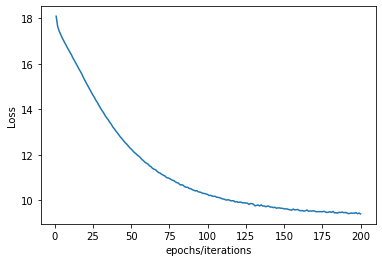

In [6]:
def learning_curve_plot(Loss):
    """
    plotting learning curve 
    
    inputs: list containing loss per epoch 
    outputs: learning curve plot 
    """
    
    x = np.arange(1,iterations+1,1)
    plt.plot(x,Loss)
    plt.xlabel("epochs/iterations")
    plt.ylabel("Loss")
    plt.show()

learning_curve_plot(Loss_list)
    